In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_classification

In [2]:
X,Y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = Y
print(df.shape)

(100, 6)


In [4]:
df

,col1,col2,col3,col4,col5,target
0,-1.141402,4.600337,-5.054972,-1.624108,2.196741,0
1,-1.525500,1.354168,-2.184409,-1.225762,-1.439039,1
2,-0.501400,-0.388341,-0.185601,-1.264874,0.852794,1
3,1.688421,-0.870656,-2.509857,-1.627394,2.271188,1
4,-1.275089,1.281493,-1.187393,1.107009,-0.834910,1
...,...,...,...,...,...,...
95,-0.654801,-0.216982,-0.982454,1.693323,-0.150062,0
96,-0.180078,0.248918,0.652512,0.678362,1.102250,0
97,-1.111727,1.397100,-1.058897,-0.382610,0.671598,0
98,-1.732807,1.228088,0.214302,1.993156,0.236994,1


In [5]:
## function for row_sampling
import random
def sample_rows(df,percent):
    return df.sample(int(percent*(df.shape[0])),replace=True)

In [6]:
# function for column_sampling
def sample_feature(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]-1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [7]:
# functions for combined sampling (row,column)

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_feature(new_df,col_percent)

In [8]:
df1 = sample_rows(df,0.2)

In [9]:
df2 = sample_rows(df,0.2)

In [10]:
df3 = sample_rows(df,0.2)

In [11]:
df1.shape

(20, 6)

In [12]:
df2.shape

(20, 6)

In [13]:
df3.shape

(20, 6)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [15]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [16]:
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [18]:
clf1.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['col1', 'col2', 'col3', 'col4', 'col5'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x7fbad06cb130>}

In [19]:
clf2.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['col1', 'col2', 'col3', 'col4', 'col5'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x7fbad06caf70>}

In [20]:
clf3.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['col1', 'col2', 'col3', 'col4', 'col5'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x7fbad06cb0c0>}

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.459\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.5, 'x[4] <= 2.407\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

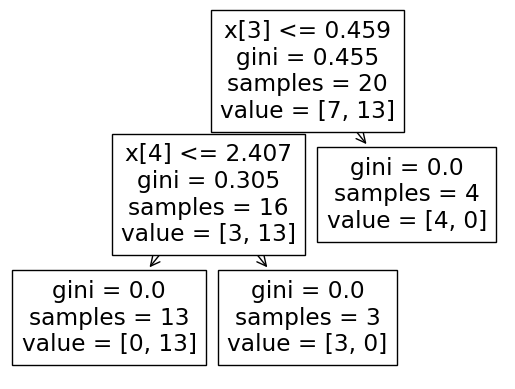

In [21]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'x[0] <= -0.598\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.5, 0.625, 'x[3] <= -0.384\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= -1.422\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

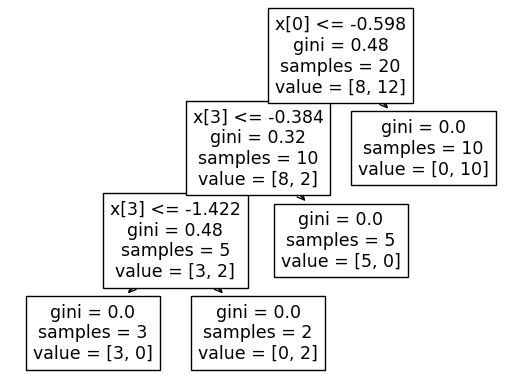

In [22]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'x[3] <= 0.686\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.5, 0.625, 'x[2] <= -2.709\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= -0.913\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

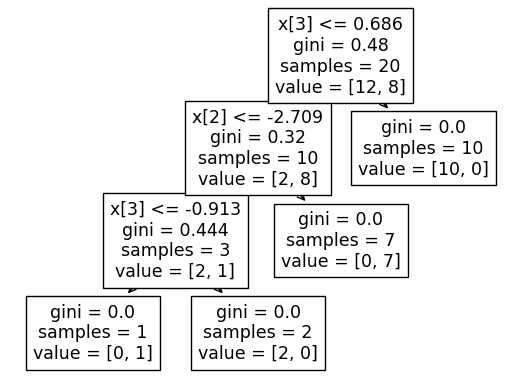

In [23]:
plot_tree(clf3)

In [24]:
test_sample = np.array([0.649334,2.054827,-0.541966,-4.338715,-0.75504]) # output 1
clf1.predict(test_sample.reshape(1,5))

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [25]:
clf2.predict(test_sample.reshape(1,5))

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
clf3.predict(test_sample.reshape(1,5))

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Column Sampling

In [27]:
df1 = sample_feature(df,0.8)

/tmp/ipykernel_5445/1857521697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [28]:
df1

,col5,col2,col1,target
0,2.196741,4.600337,-1.141402,0
1,-1.439039,1.354168,-1.525500,1
2,0.852794,-0.388341,-0.501400,1
3,2.271188,-0.870656,1.688421,1
4,-0.834910,1.281493,-1.275089,1
...,...,...,...,...
95,-0.150062,-0.216982,-0.654801,0
96,1.102250,0.248918,-0.180078,0
97,0.671598,1.397100,-1.111727,0
98,0.236994,1.228088,-1.732807,1


In [29]:
df2 = sample_feature(df,0.8)

/tmp/ipykernel_5445/1857521697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [30]:
df2

,col4,col5,col2,target
0,-1.624108,2.196741,4.600337,0
1,-1.225762,-1.439039,1.354168,1
2,-1.264874,0.852794,-0.388341,1
3,-1.627394,2.271188,-0.870656,1
4,1.107009,-0.834910,1.281493,1
...,...,...,...,...
95,1.693323,-0.150062,-0.216982,0
96,0.678362,1.102250,0.248918,0
97,-0.382610,0.671598,1.397100,0
98,1.993156,0.236994,1.228088,1


In [31]:
df3 = sample_feature(df,0.8)

/tmp/ipykernel_5445/1857521697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [32]:
df3

,col3,col5,col4,target
0,-5.054972,2.196741,-1.624108,0
1,-2.184409,-1.439039,-1.225762,1
2,-0.185601,0.852794,-1.264874,1
3,-2.509857,2.271188,-1.627394,1
4,-1.187393,-0.834910,1.107009,1
...,...,...,...,...
95,-0.982454,-0.150062,1.693323,0
96,0.652512,1.102250,0.678362,0
97,-1.058897,0.671598,-0.382610,0
98,0.214302,0.236994,1.993156,1


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [34]:
clf4.fit(df1.iloc[:,0:3],df1.iloc[:,-1])

DecisionTreeClassifier()

In [35]:
clf5.fit(df2.iloc[:,0:3],df2.iloc[:,-1])

DecisionTreeClassifier()

In [36]:
clf6.fit(df3.iloc[:,0:3],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.565, 0.95, 'x[0] <= 2.466\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.525, 0.85, 'x[2] <= -0.145\ngini = 0.496\nsamples = 92\nvalue = [42, 50]'),
 Text(0.25, 0.75, 'x[1] <= 0.128\ngini = 0.499\nsamples = 73\nvalue = [38, 35]'),
 Text(0.08, 0.65, 'x[0] <= 0.564\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.04, 0.55, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.12, 0.55, 'x[0] <= 0.985\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42, 0.65, 'x[0] <= -0.068\ngini = 0.491\nsamples = 60\nvalue = [26, 34]'),
 Text(0.38, 0.55, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.46, 0.55, 'x[2] <= -1.615\ngini = 0.497\nsamples = 48\nvalue = [26, 22]'),
 Text(0.24, 0.45, 'x[1] <= 1.195\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.2, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.28, 0.35, 'x[0] <= 0.981\ng

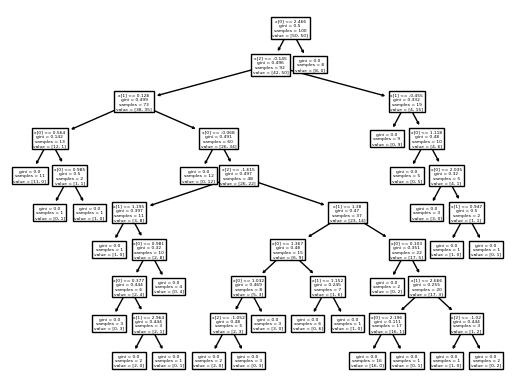

In [37]:
plot_tree(clf4)

[Text(0.5, 0.9375, 'x[0] <= 0.035\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.29411764705882354, 0.8125, 'x[1] <= 2.502\ngini = 0.357\nsamples = 56\nvalue = [13, 43]'),
 Text(0.23529411764705882, 0.6875, 'x[2] <= 1.136\ngini = 0.265\nsamples = 51\nvalue = [8, 43]'),
 Text(0.11764705882352941, 0.5625, 'x[1] <= -1.865\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.058823529411764705, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.4375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.35294117647058826, 0.5625, 'x[1] <= -0.014\ngini = 0.403\nsamples = 25\nvalue = [7, 18]'),
 Text(0.29411764705882354, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4117647058823529, 0.4375, 'x[0] <= -0.783\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(0.29411764705882354, 0.3125, 'x[2] <= 3.812\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.23529411764705882, 0.1875, 'x[0] <= -2.343\ngini = 0.18\nsamples = 10\nvalue = [

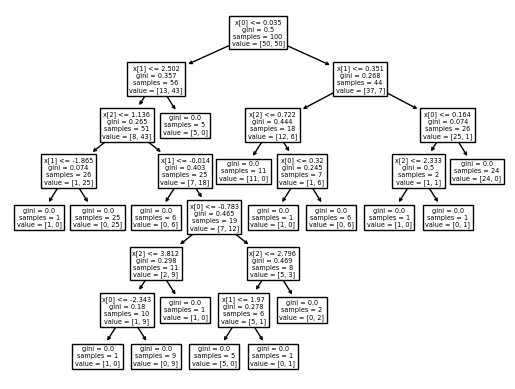

In [38]:
plot_tree(clf5)

[Text(0.5, 0.9615384615384616, 'x[2] <= 0.035\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2222222222222222, 0.8846153846153846, 'x[1] <= 2.502\ngini = 0.357\nsamples = 56\nvalue = [13, 43]'),
 Text(0.16666666666666666, 0.8076923076923077, 'x[0] <= -4.697\ngini = 0.265\nsamples = 51\nvalue = [8, 43]'),
 Text(0.1111111111111111, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.7307692307692307, 'x[1] <= -2.065\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(0.16666666666666666, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2777777777777778, 0.6538461538461539, 'x[2] <= -0.782\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(0.16666666666666666, 0.5769230769230769, 'x[2] <= -2.368\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(0.1111111111111111, 0.5, 'x[1] <= 1.179\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.4230769230769231, 'gini = 0.0\nsamples = 1\nvalue = [1

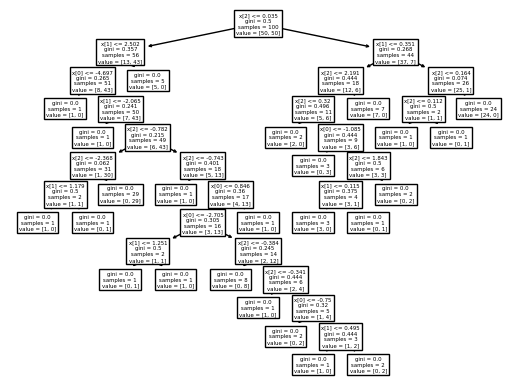

In [39]:
plot_tree(clf6)

In [42]:
test_arr = np.array([1.107009,-0.834910,1.281493])
clf4.predict(test_arr.reshape(1,3))

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [43]:
clf5.predict(test_arr.reshape(1,3))

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [44]:
clf6.predict(test_arr.reshape(1,3))

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])